LABORATORIO 2 - Procesamiento digital de señales
Hineill David Céspedes Espinoza
20213704

Implementar y dibujar las siguientes se˜nales de prueba. Considerar un l´ımite de
-100 a 100 para el eje X en sus gr´aficos.
x1[n] = cos( π
40n), n ∈ [−200, 199]
x2[n] = cos( π
50n), n ∈ [−200, 199]
Usando estas 2 se˜nales valide experimentalmente la linearidad y la propiedad de
invarianza en el tiempo para los siguientes sistemas. Teniendo en cuenta que para el
an´alisis de linearidad deber´a usar a1=a2=1 como pesos para las se˜nales de entrada y
un retardo en el tiempo k=20 para el an´alisis de la invarianza en el tiempo. Deber´a
implementar el c´odigo requerido para probar y mostrar gr´aficamente este an´alisis.

Sistema 1 (Tarea as´ıncrona) :
y[n] = T1{x[n]} = x[n+10]+x[n−10]
2
Sistema 2 (1pto.):
y[n] = T2{x[n]} = n.x[n]
Sistema 3 (1pto.):
y[n] = T3{x[n]} = n.x2[n]

PRIMER SISTEMA

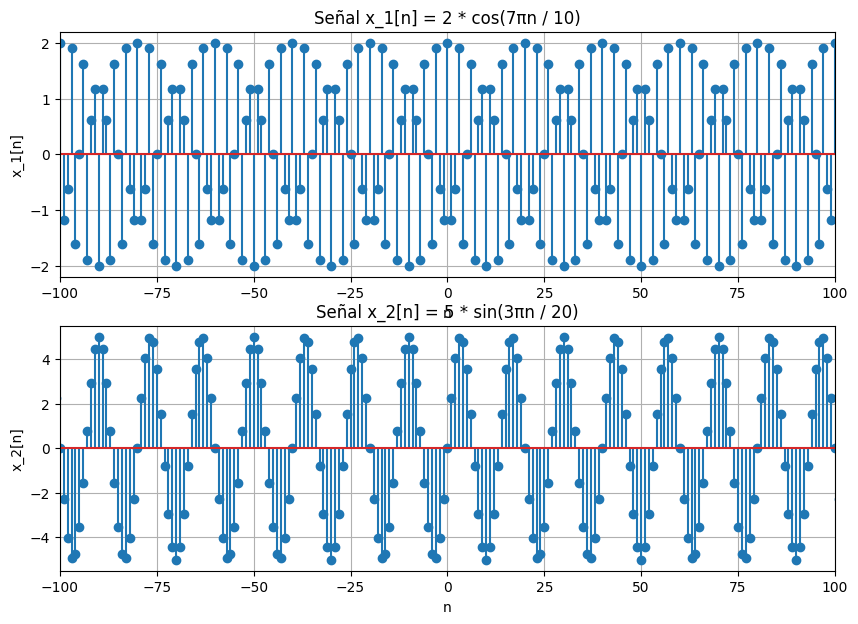

In [121]:
#Para el primer Sistema
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

#Primero generamos las señales solicitadas y las gráficamos
n = np.arange(-200,200)
x_1 = 2*np.cos((7*np.pi/10) * (n) ) #LAS USAREMOS DE PRUEBA EN PREGUNTA 2
x_2 = 5* np.sin( ( 3*np.pi/20 ) * n)
indices= n
plt.figure(figsize=(10, 7))

# Gráfico para x_1
plt.subplot(2, 1, 1)
plt.stem(n, x_1)
plt.title('Señal x_1[n] = 2 * cos(7πn / 10)')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('x_1[n]')
plt.grid(True)

# Gráfico para x_2
plt.subplot(2, 1, 2) 
plt.stem(n, x_2)
plt.title('Señal x_2[n] = 5 * sin(3πn / 20)')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('x_2[n]')
plt.grid(True)
plt.show()


In [122]:
#Definimos parámetros para probar la linealidad del sistema 
a2 = 1
a1 = 1
k = 20 #Delay

SEGUNDO SISTEMA

In [123]:
#Para el segundo Sistema
def sistema2(input, indices):
    salida = []
    for i   in np.arange(len(indices)):
        salida.append(indices[i] * input[i])
    return np.asarray(salida)

DEMOSTRACIÓN LINEALIDAD SEGUNDO SISTEMA

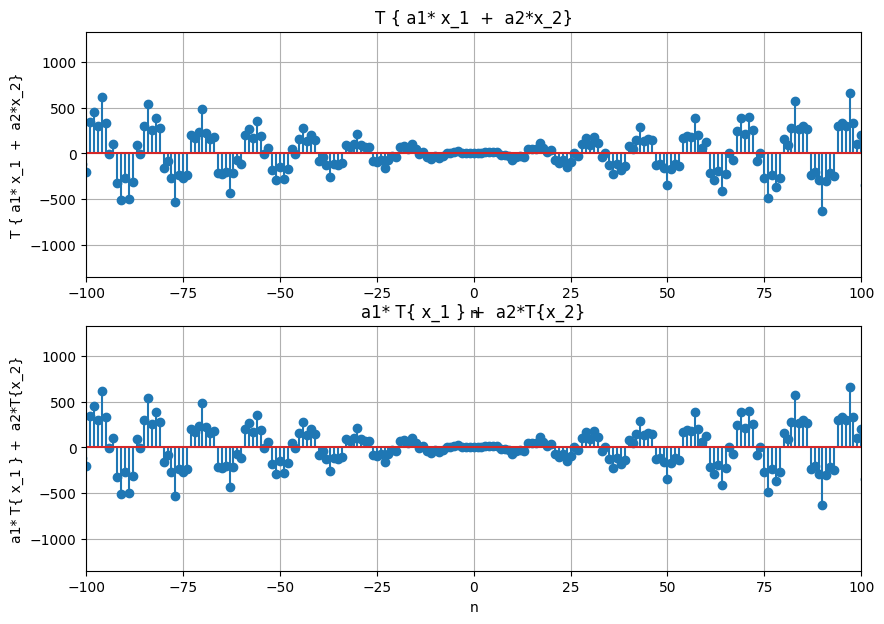

error promedio caso lineal : 9.223339464621875e-13


In [124]:
#Demostramos linealidad
#dado un T { a1* x_1  +  a2*x_2} = a1* T{x_1} +  a2*T{x_2}
term_1 =  sistema2(a1*x_1 + a2*x_2 , indices)
term_2 =  a1 * sistema2(x_1, indices) +a2 * sistema2(x_2 , indices)
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(indices, term_1)
plt.title('T { a1* x_1  +  a2*x_2}')
plt.xlim([-100,100])
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlabel('n')
plt.ylabel('T { a1* x_1  +  a2*x_2}')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.stem(indices, term_2)
plt.title('a1* T{ x_1 } +  a2*T{x_2}')
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('a1* T{ x_1 } +  a2*T{x_2}')
plt.grid(True)
plt.show()
print(f"error promedio caso lineal : {np.linalg.norm(term_1-term_2)}")

Como la diferencia entre ammbas gráficas es extremadamente bajo , podemos afirmar que el valor sistema sí es lineal  

DEMOSTRACIÓN INVARIANZA SEGUNDO SISTEMA

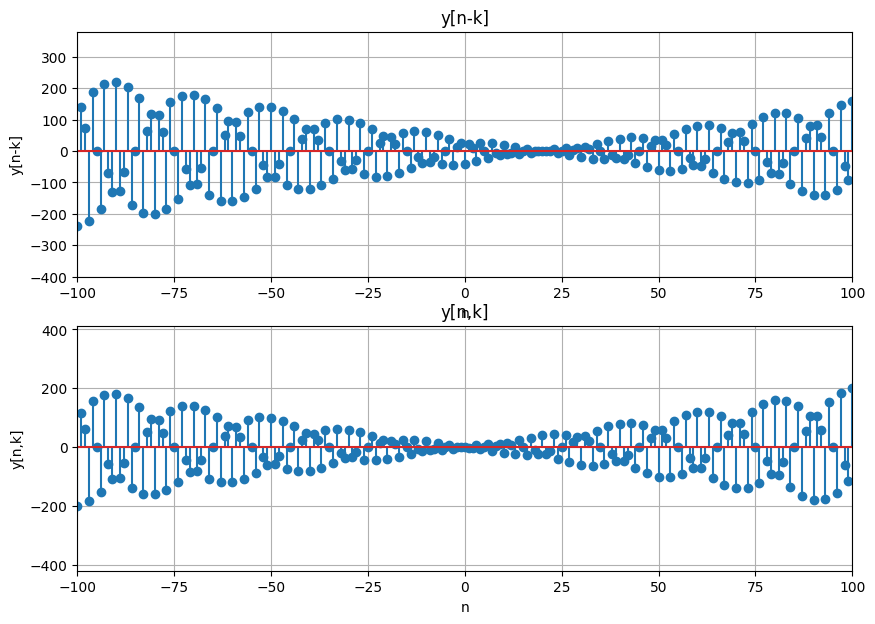

error promedio caso invarianza 565.6854249492378


In [125]:
#Demostramos invarianza en el tiempo 
#y[n-k] = y [n,k] -> es TI
#Aplicamos retraso en el tiempo a la entrada para term2
indices_prueba_2 =  indices #Hacemos una copia 
def retraso_signal(signal , indices, delay):
    signal_delay = np.roll(np.pad(signal,(delay,delay), mode="constant" ,constant_values=0) ,  delay ) 
    idx= np.arange(np.min(indices) - delay ,  np.max(indices) + delay+1)
    return [signal_delay , idx]
term_1 = retraso_signal(sistema2(x_1,indices_prueba_2),indices, k )[0]
term_1_idx = retraso_signal(sistema2(x_1,indices_prueba_2),indices, k )[1]
indices_prueba_2_2 =  indices #Hacemos una copia 
term_2 = sistema2(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1])
term_2_idx = retraso_signal(x_1, indices_prueba_2_2, k)[1]
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.xlim([-100,100])
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('y[n,k]')
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")


Sí es lineal pero no es TI

TERCER SISTEMA 

In [126]:
#Para el tercer sistema
n = np.arange(-200,199)
x_1 = 2*np.cos((7*np.pi/10) * (n) ) #LAS USAREMOS DE PRUEBA EN PREGUNTA 2
x_2 = 5* np.sin( ( 3*np.pi/20 ) * n)
indices= n

def sistema3(input, indices):
    salida = []
    for i   in np.arange(len(indices)):
        salida.append(indices[i] * (input[i])*(input[i]))
    return [np.asarray(salida), indices]


DEMOSTRACIÓN LINEAL DEL TERCER SISTEMA

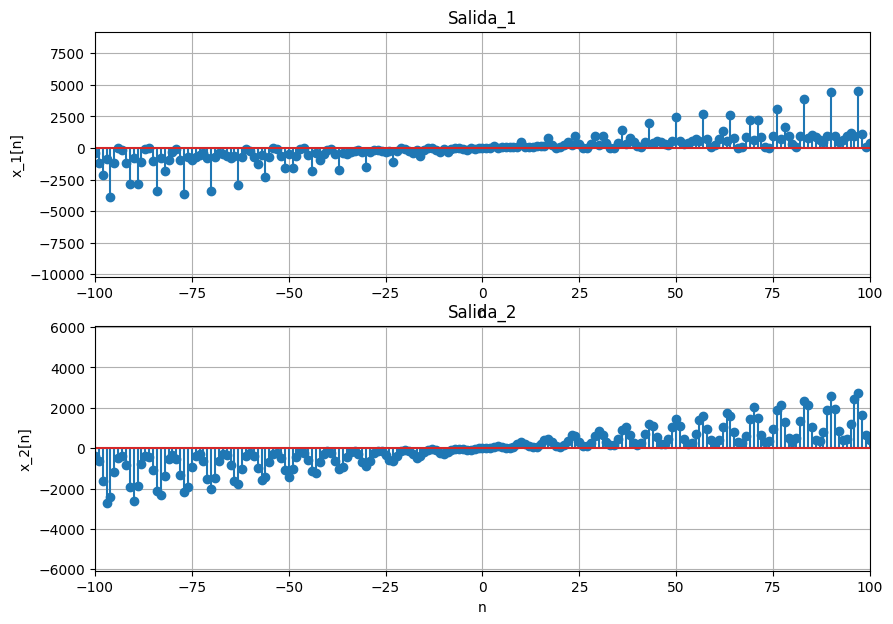

error promedio de linealidad : 23067.006362669596


In [127]:
#DEMOSTRAMOS LINEALIDAD
#dado un T { a1* x_1  +  a2*x_2} = a1* T{x_1} +  a2*T{x_2}
term_1 = sistema3(a1*x_1 + a2*x_2 , indices)[0]
term_1_idx = sistema3(a1*x_1 + a2*x_2 , indices)[1]
term_2 = a1*sistema3(x_1, indices)[0] + a2*sistema3(x_2 , indices)[0]
term_2_idx = sistema3(x_1, indices)[1]

plt.figure(figsize=(10, 7))
# Gráfico para x_1
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('Salida_1')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('x_1[n]')
plt.grid(True)

# Gráfico para x_2
plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('Salida_2')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('x_2[n]')
plt.grid(True)
plt.show()

print(f"error promedio de linealidad : {np.linalg.norm(term_1-term_2)}")

No es lineal

DEMOSTRACIÓN INVARIANZA SISTEMA 3

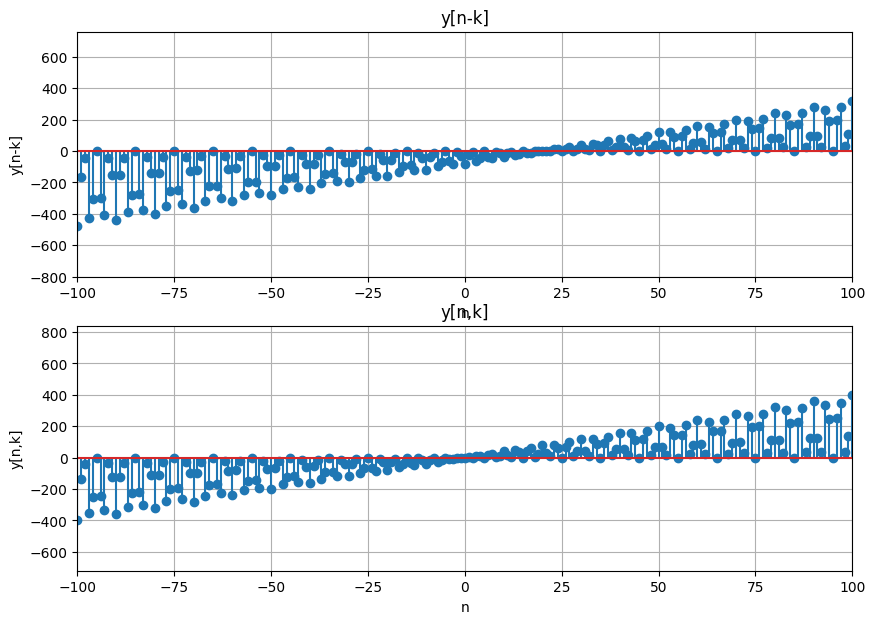

error promedio caso invarianza 979.405977099128


In [129]:
#Demostramos invarianza en el tiempo 
#y[n-k] = y [n,k] -> es TI

#Aplicamos retraso en el tiempo a la entrada para term2
indices_prueba_2 =  indices #Hacemos una copia 


term_1 = retraso_signal(sistema3(x_1,indices)[0],sistema3(x_1,indices)[1], k )[0]
term_1_idx = retraso_signal(sistema3(x_1,indices)[0],sistema3(x_1,indices)[1], k )[1]

indices_prueba_2_2 =  indices #Hacemos una copia 

term_2 = sistema3(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1])[0]
term_2_idx = sistema3(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1])[1]
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.xlim([-100,100])
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)
plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('y[n,k]')
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")

No es lineal ni invariante en el tiempo 

PREGUNTA 2

PREGUNTA 2
Imagine que se tiene los siguientes sistemas:
Sistema 1 (H[n]):
y1[n] = 10x[n] + 0.25x[n − 1] + 0.5y1[n − 1]
Sistema 2 (G[n]):
y2[n] = x[n] − 0.2x[n − 1] + 0.1x[n − 2] + 0.8y2[n − 1] − 0.6y2[n − 2]
Donde y[n] son las se˜nales de salida de los sistemas 1 y 2 respectivamente

a) (1pto.) Implemente un c´odigo para obtener la respuesta al impulso de G[n] y
graf´ıquelo empleando N=50 muestras.

In [131]:
#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Hineill\AppData\Local\Temp\ipykernel_46952\3834352999.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y_n, use_line_collection=True)


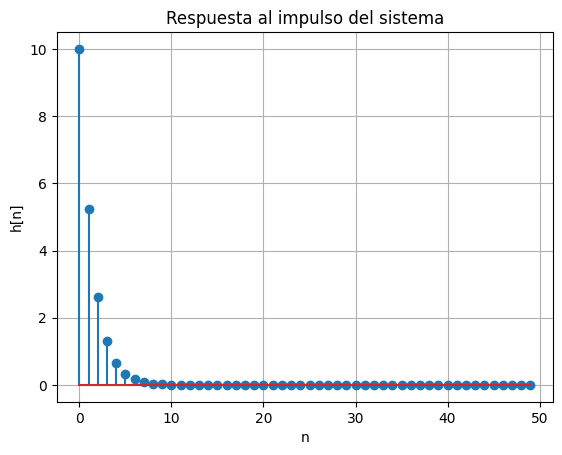

In [132]:
#ASINCRONO
#Como se menciona que el sistema está inicialmente en reposo  
#y[-1] = 0
N= 50 #Número de samples
#Para simular la respuesta al impulso 
#Asumiremos un x_n = dirac(n)
x_n = np.zeros(N)
x_n[0]= 1
#Ahora metemos todo al bucle para barrer los valores de y_n
#y[0] = 10x[0] + 0.25*x[-1] + 0.5y[-1]
#
y_n = np.zeros(N)
for i  in range(N): 
    if (i==0) :
        y_n[i]= 10*x_n[i] 
    else:
        y_n[i]= 10*x_n[i] + 0.25*x_n[i-1] + 0.5*y_n[i-1]
# Graficar y_n
plt.stem(y_n, use_line_collection=True)
plt.title('Respuesta al impulso del sistema')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()
h_n=y_n #Respuesta al impulso

CÁLCULO G[n]

C:\Users\Hineill\AppData\Local\Temp\ipykernel_46952\2689529219.py:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y_n_2, use_line_collection=True)


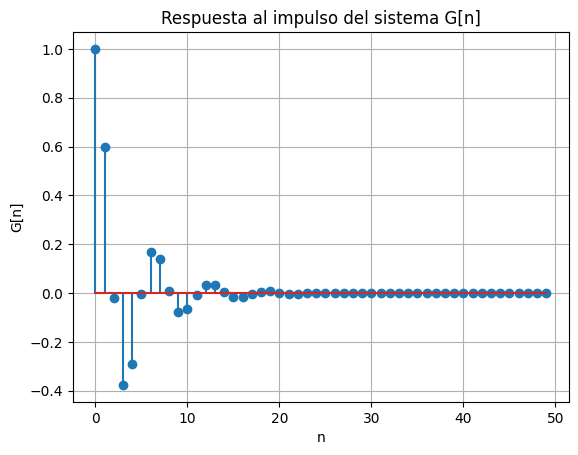

In [133]:
#Como se menciona que el sistema está inicialmente en reposo  
#y[0] = 0
N= 50 #Número de samples
#Para simular la respuesta al impulso 
#Asumiremos un x_n = dirac(n)
#y[-1]= 0 por el reposo
x_n = np.zeros(N)
x_n[0]= 1
#Ahora metemos todo al bucle para barrer los valores de y_n
y_n_2 = np.zeros(N)
for i  in range(N): 
    if (i==0) :
        y_n_2[i]= x_n[i]
    else:
        y_n_2[i]= x_n[i] - 0.2*x_n[i-1] + 0.1*x_n[i-2]   + 0.8*y_n_2[i-1] -0.6 *y_n_2[i-2]
# Graficar y_n
plt.stem(y_n_2, use_line_collection=True)
plt.title('Respuesta al impulso del sistema G[n]')
plt.xlabel('n')
plt.ylabel('G[n]')
plt.grid(True)
plt.show()
g_n=y_n_2

De igual forma que en el lab asincrono se calculo la respuesta al impulso asumiendo una entrada de delta de kronecker y replicando la acción del sistema.

b) (1pto.)Implemente un c´odigo para demostrar la linearidad e invarianza en el
tiempo de H[n].

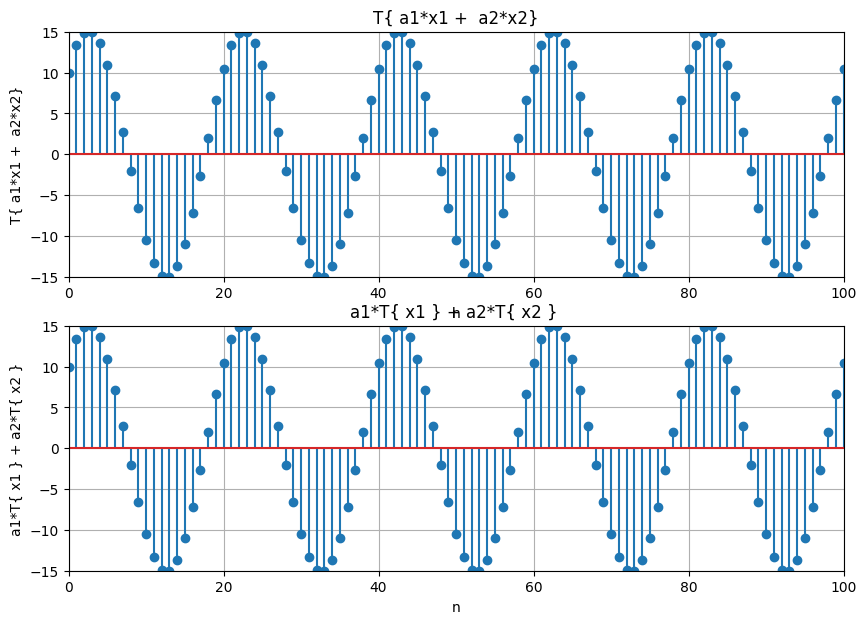

error promedio caso linealidad 8.106665767237443e-14


In [134]:
#parametros para determinar la linealidad 
a1 =1 
a2 =1
k = 20 #delay 
N=4000
n = np.arange(N)
#PRUEBAS 
x1 = np.sin(0.1 * np.pi * n)  
x2 = np.cos(0.1 * np.pi * n) #cambiar 

#Linealidad 
def sistema_H(input , indices):
    y_n = np.zeros(len(indices))
    for i  in range(len(indices)): 
        if (i==0) :
            y_n[i]= 10*input[i] 
        else:
            y_n[i]= 10*input[i] + 0.25*input[i-1] + 0.5*input[i-1]
    nuevo_indices =  np.arange(indices[0] , indices[0]  +  len(y_n) )
    return [y_n , nuevo_indices]  

#PROBAMOS LINEALIDAD 

term_1 =  a1*sistema_H(x1,n)[0] + a2 * sistema_H(x2,n)[0]
term_1_idx =  sistema_H(x1,n)[1]

term_2 =  sistema_H(a1*x1 + a2*x2 ,n)[0]
term_2_idx =  sistema_H(a1*x1 + a2*x2 ,n )[1]

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('T{ a1*x1 +  a2*x2}')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('T{ a1*x1 +  a2*x2}')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('a1*T{ x1 } + a2*T{ x2 } ')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('a1*T{ x1 } + a2*T{ x2 }')
plt.grid(True)
plt.show()
print(f"error promedio caso linealidad {np.linalg.norm(term_1-term_2)}")

SÍ ES LINEAL 

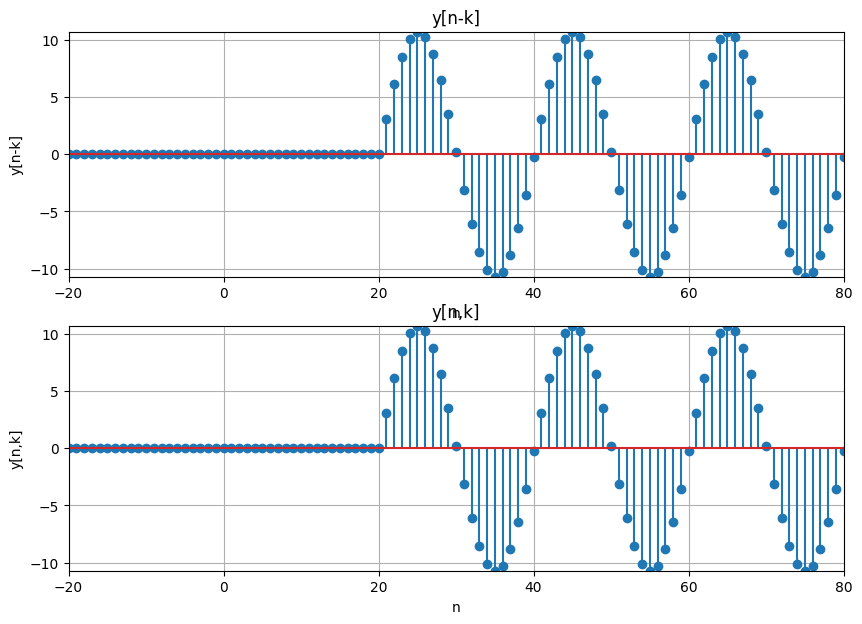

error promedio caso invarianza 0.0


In [135]:
def retraso_signal(signal , indices, delay):
    signal_delay = np.roll(np.pad(signal,(delay,delay), mode="constant" ,constant_values=0) ,  delay ) 
    idx= np.arange(np.min(indices) - delay ,  np.max(indices) + delay+1)
    return [signal_delay , idx]

#PROBAMOOS INVARIRANZA

term_1 =  sistema_H(retraso_signal(x1 ,n ,k )[0], retraso_signal(x1 ,n ,k )[1] )[0]
term_1_idx =  sistema_H(retraso_signal(x1 ,n ,k  )[0], retraso_signal(x1,n ,k )[1] )[1] 


term_2 =  retraso_signal(sistema_H(x1, n)[0] , sistema_H(x1, n)[1],k)[0]
term_2_idx =  retraso_signal(sistema_H(x1, n)[0] , sistema_H(x1, n)[1],k)[1]
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('y[n,k]')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")

Sí es lineal e invariante en el tiempo

c) (1pto.)Implemente el c´odigo para demostrar la linearidad e invarianza en el tiempo
de G[n].

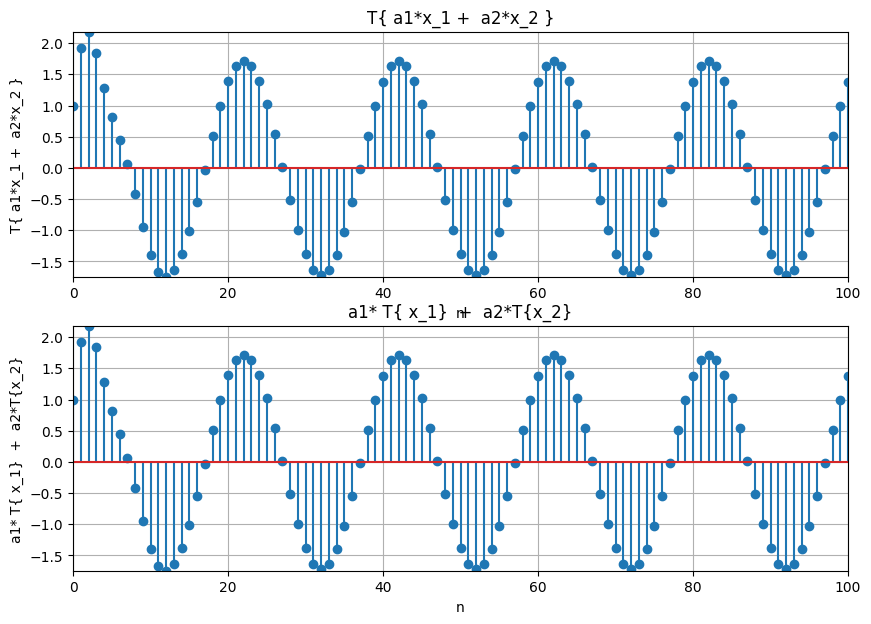

error promedio caso Linealidad 2.0271833360936324e-14


In [160]:
a1 =1 
a2 =1
k = 20 #delay 
N=4000
n = np.arange(N)
#PRUEBAS 
x1 = np.sin(0.1 * np.pi * n)  
x2 = np.cos(0.1 * np.pi * n) #cambiar 

def sistema_g_n(input , indices):
    output = np.zeros(len(indices))
    for i  in range(len(indices)): 
        if (i==0) :
            output[i]= input[i]
        else:
            output[i]= input[i] - 0.2*input[i-1] + 0.1*input[i-2]   + 0.8*output[i-1] -0.6 *output[i-2]
    nuevo_indices =  np.arange(indices[0] , indices[0]  +  len(output))
    return [output , nuevo_indices ]

#PROBAMOS LINEALIDAD 
term_1 =  a1*sistema_g_n(x1,n)[0] + a2 * sistema_g_n(x2,n)[0]
term_1_idx =  sistema_g_n(x1,n)[1]

term_2 =  sistema_g_n(a1*x1 + a2*x2 ,n)[0]
term_2_idx =  sistema_g_n(a1*x1 + a2*x2 ,n )[1]

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('T{ a1*x_1 +  a2*x_2 }')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('T{ a1*x_1 +  a2*x_2 }')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('a1* T{ x_1}  +  a2*T{x_2}')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('a1* T{ x_1}  +  a2*T{x_2}')
plt.grid(True)
plt.show()
print(f"error promedio caso Linealidad {np.linalg.norm(term_1-term_2)}")


4040
4040
0
3999
4040
4040


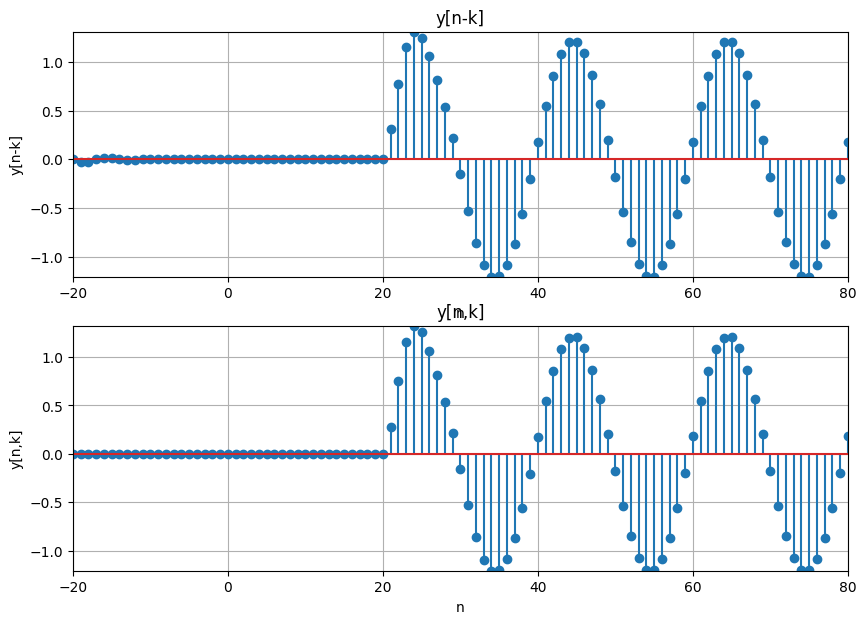

error promedio caso invarianza 0.06307898521012452


In [164]:
#PROBAMOOS INVARIRANZA
#print(n[0])
#print(n[-1])
#print(retraso_signal(x1 ,n ,k )[1][0])
#print(retraso_signal(x1 ,n ,k )[1][-1])
term_1 =  sistema_g_n(retraso_signal(x1 ,n ,k )[0], retraso_signal(x1 ,n ,k )[1] )[0]
term_1_idx =  sistema_g_n(retraso_signal(x1 ,n ,k  )[0], retraso_signal(x1,n ,k )[1] )[1] 
#print(term_1_idx[0])
#print(term_1_idx[-1])

print(len(term_1))
print(len(term_1_idx))

print(sistema_g_n(x1, n)[1][0])
print(sistema_g_n(x1, n)[1][-1])

term_2 =  retraso_signal(sistema_g_n(x1, n)[0] , sistema_g_n(x1, n)[1],k)[0]
term_2_idx =  retraso_signal(sistema_g_n(x1, n)[0] , sistema_g_n(x1, n)[1],k)[1]

print(len(term_2))
print(len(term_2_idx))

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('y[n,k]')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")

d)(1pto.) Implemente un programa para calcular la respuesta al impulso del siguiente
sistema (H[n] * G[n]) y graf´ıquelo usando N=50 muestras.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


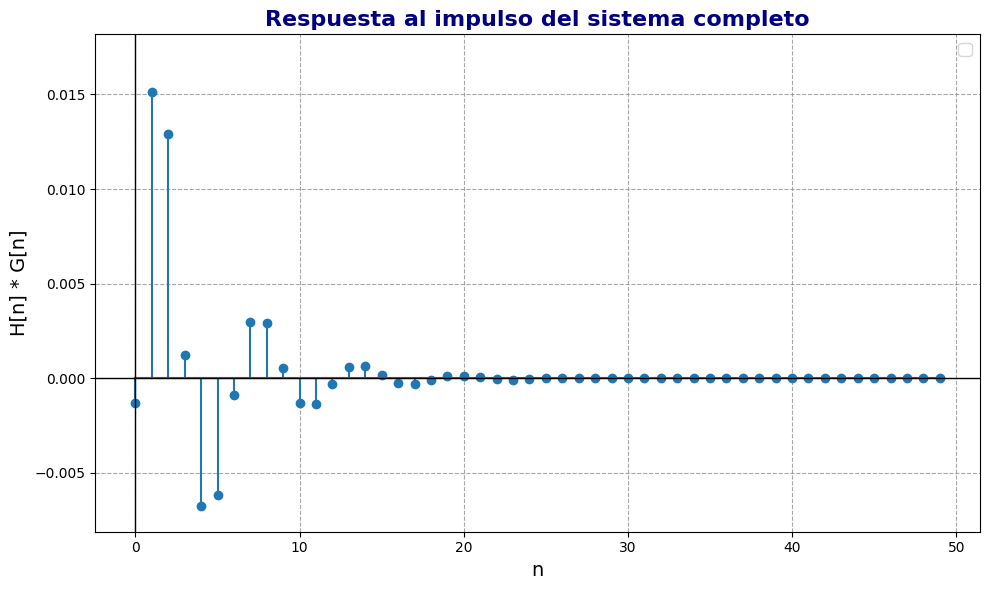

In [170]:
#sistema_g_n
#sistema_H
g_n , h_n
respuesta_final = np.convolve(g_n ,h_n , "same")


plt.figure(figsize=(10, 6), dpi=100)  
plt.stem(np.arange(len(respuesta_final)), respuesta_final)
plt.title("Respuesta al impulso del sistema completo", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("n", fontsize=14)
plt.ylabel("H[n] * G[n]", fontsize=14)
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7) 
plt.axhline(0, color='black',linewidth=1)  
plt.axvline(0, color='black',linewidth=1)  
plt.ylim(np.min(respuesta_final) * 1.2, np.max(respuesta_final) * 1.2)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()

e) (1pto.)Implemente el c´odigo para demostrar la linearidad e invarianza en el tiempo
de H[n] * G[n].

PROBAMOS LINEALIDAD DEL SISTEMA FINAL

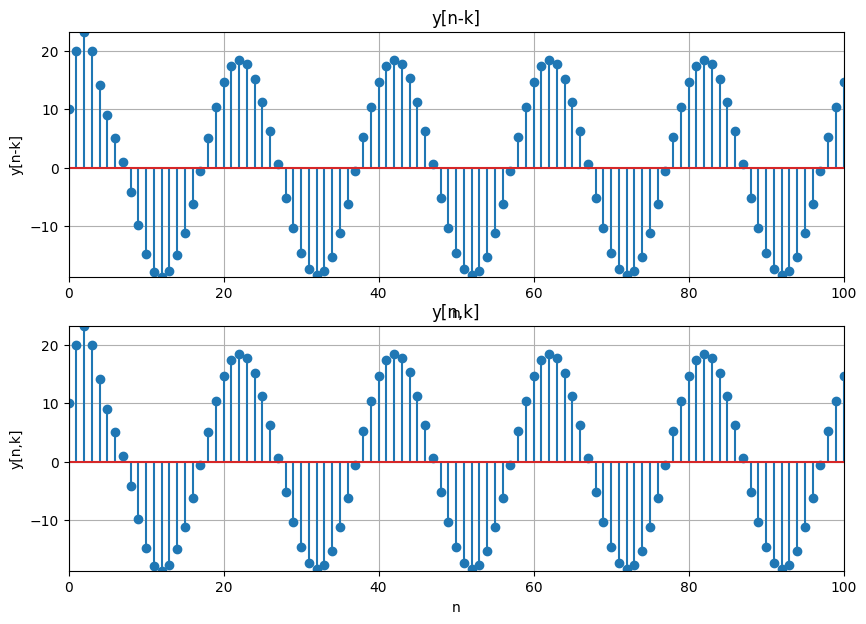

error promedio caso invarianza 2.275748144008248e-13


In [171]:
def sistema_respuesta_final (input,  indices): 
    return [sistema_g_n(sistema_H(input ,indices)[0] ,  sistema_H(input ,indices)[1])[0] , sistema_g_n(sistema_H(input ,indices)[0] ,  sistema_H(input ,indices)[1])[1] ]

#PROBAMOS LINEALIDAD 

term_1 =  a1*sistema_respuesta_final(x1,n)[0] + a2 * sistema_respuesta_final(x2,n)[0]
term_1_idx =  sistema_respuesta_final(x1,n)[1]

term_2 =  sistema_respuesta_final(a1*x1 + a2*x2 ,n)[0]
term_2_idx =  sistema_respuesta_final(a1*x1 + a2*x2 ,n )[1]

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('y[n,k]')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")



PROBAMOS INVARIANZA DEL SISTEMA TOTAL 

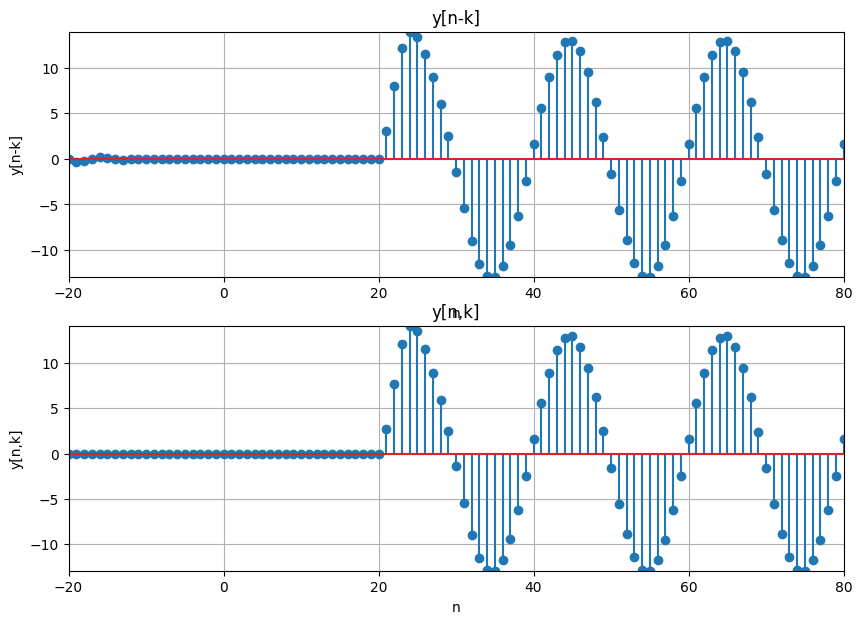

error promedio caso invarianza 0.7207773719893099


In [174]:
#PROBAMOOS INVARIRANZA
term_1 =  sistema_respuesta_final(retraso_signal(x1 ,n ,k )[0], retraso_signal(x1 ,n ,k )[1] )[0]
term_1_idx =  sistema_respuesta_final(retraso_signal(x1 ,n ,k  )[0], retraso_signal(x1,n ,k )[1] )[1] 

term_2 =  retraso_signal(sistema_respuesta_final(x1, n)[0] , sistema_respuesta_final(x1, n)[1],k)[0]
term_2_idx =  retraso_signal(sistema_respuesta_final(x1, n)[0] , sistema_respuesta_final(x1, n)[1],k)[1]

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('y[n,k]')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")



PREGUNTA 3

Teniendo en cuenta que la correlaci´on de dos se˜nales discretas est´a representada
como:
rxy[n] =
P∞
k=−∞ x[k]y[k − n]
Cree las siguientes se˜nales usando N=16000 muestras.
x1[n] = sin(2.π. 147
16000.n) + sin(2.π. 294
16000.n)
x2[n] = sin(2.π. 131
16000.n) + sin(2.π. 262
16000.n)

a) (1pto.) Aplique la correlaci´on de cada se˜nal x1[n] y x2[n] contra la se˜nal de audio
(chord.wav, tomar como valores a partir de t=1.1s) usando convoluci´on. Luego
obtenga el valor m´aximo y mu´estrelo.

44100
519750
11.785691609977324


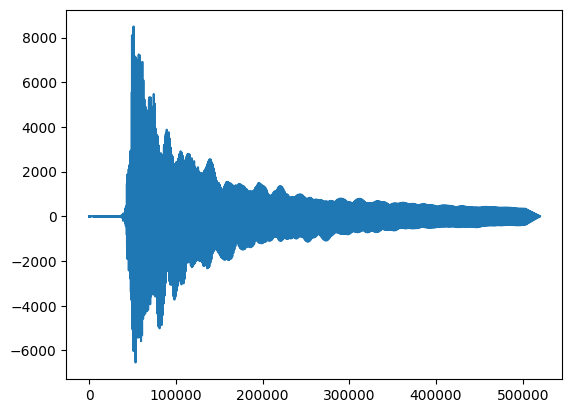

In [73]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
N=16000
# Cargar el archivo .wav
fs, data = wavfile.read('chord.wav') 

plt.plot(np.arange(len(data)) , data)
print(fs)
print(len(data))
print((len(data)-1)*(1/fs))

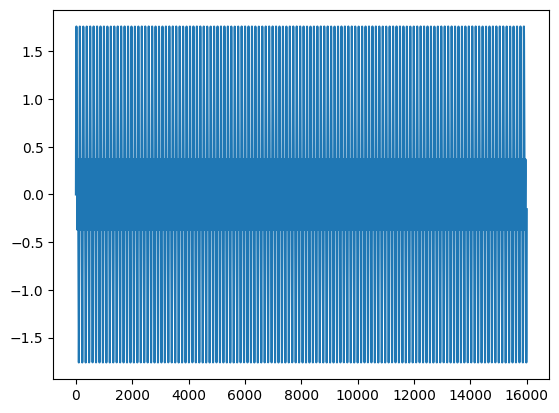

In [74]:
n = np.arange(N)
x_1 =  np.sin(2*np.pi*(147/16000)*n) + np.sin(2*np.pi*(294/16000)*n)
x_2 =  np.sin(2*np.pi*(131/16000)*n) + np.sin(2*np.pi*(262/16000)*n)
plt.plot(n, x_2)

471241
16000
487240
487240


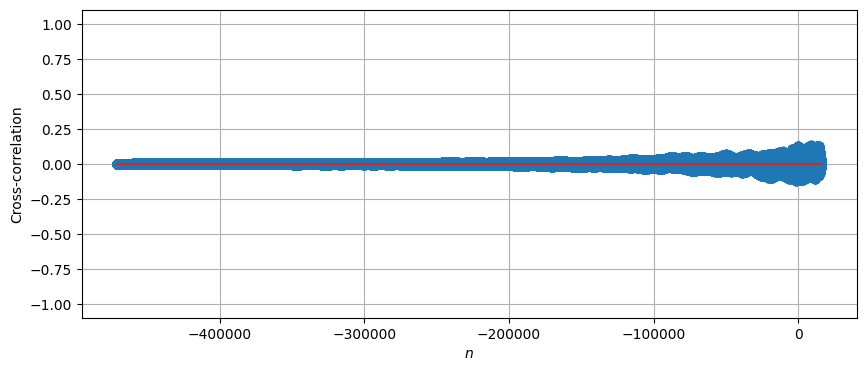

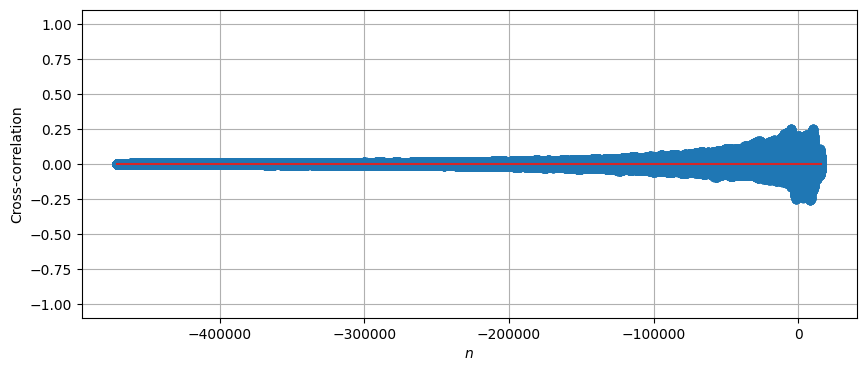

In [76]:
paso =  1/fs
data_limitada = []
counter=0
for i in data:
    counter = counter+ paso
    if(counter>1.1):
        data_limitada.append(i)

y_n =  np.asarray(data_limitada)

print(len(y_n))
print(len(x_1))
r1 = np.correlate(x_1,y_n,mode='full')
r2 = np.correlate(x_2,y_n,mode='full')
print(len(r1))
print(len(r2))
idx = np.arange(-len(y_n),-len(y_n) + len(r1)  )

p_y = np.sum(y_n**2)
p_1 = np.sum(x_1**2)
p_2 = np.sum(x_2**2)

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(idx,r1/np.sqrt(p_1*p_y))
ax.set_xlabel('$n$')
ax.set_ylim([-1.1,1.1])
ax.set_ylabel('Cross-correlation')
ax.grid()

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(idx,r2/np.sqrt(p_2*p_y))
ax.set_xlabel('$n$')
ax.set_ylim([-1.1,1.1])
ax.set_ylabel('Cross-correlation')
ax.grid()

In [79]:
print(np.mean(np.abs(r1)))
print(np.mean(np.abs(r2)))

31357.391617051784
58843.75916050024


In [ ]:


#Realizamos la correlación 
r1 = np.correlate(x_1,y_n,mode='full')
r2 = np.correlate(x_2,y_n,mode='full')

nr = np.arange(-N-len(y_n),-N-len(y_n)+len(r1))

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(nr,r1)
ax.set_xlabel('$n$')
ax.set_ylim([-1.1,1.1])
ax.set_ylabel('Cross-correlation')
ax.grid()

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(nr,r2)
ax.set_xlabel('$n$')
ax.set_ylim([-1.1,1.1])
ax.set_ylabel('Cross-correlation')
ax.grid()





b)(1pto.) Acorde a los resultados obtenidos qu´e se˜nal es m´as similar al archivo de
audio. Recordar que a mayor valor de correlaci´on m´as similaridad se obtiene.

c)(1pto.) Realice la convoluci´on de ambas se˜nales X1 y X2 usando FFT. Luego
muestre si esta se˜nal obtenida tiene mayor similitud con la se˜nal de audio.

C:\Users\Hineill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\Hineill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


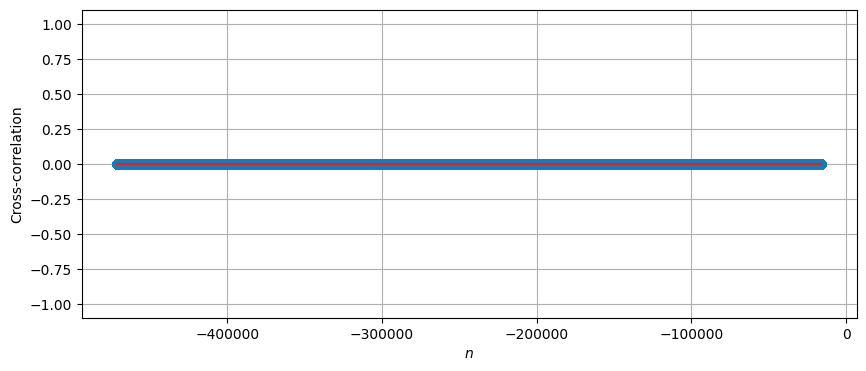

In [85]:
x_1_fft = np.fft.fft(np.fft.fftshift(x_1))
x_2_fft = np.fft.fft(np.fft.fftshift(x_2))

x_result_fft = x_1_fft *  x_2_fft
x_result = np.fft.ifft(np.fft.fftshift(x_result_fft))

p_result =  np.sum(x_result**2)
nueva_final  =  np.correlate(x_result , y_n )
idx = np.arange(-len(y_n),-len(y_n) + len(nueva_final)  )

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(idx,nueva_final/np.sqrt(p_result*p_y))
ax.set_xlabel('$n$')
ax.set_ylim([-1.1,1.1])
ax.set_ylabel('Cross-correlation')
ax.grid()
